# Imports

In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm

import IPython.display as ipd

import librosa
import librosa.display


In [2]:
pwd

'c:\\Users\\glete\\OneDrive\\Bureau\\Guillaume\\3A\\CS\\ICE\\Deep Learning\\Projet\\notebooks'

# Discovering csv

In [3]:
tracks = pd.read_csv('.././data/raw/fma_metadata/tracks.csv', index_col=0, header=[0, 1]) # index_col=0, header=[0, 1, 2]
tracks.head()

album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
3               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00      NaN   
20              0  2008-11-26 01:45:05  2009-01-06 00:00:00      NaN   

                                                                          \
         favorites id                                information listens   
track_id                                                                   
2                4  1                                    <p></p>    6073   
3                4  1                                    <p></p>    6073   
5                4  1                                    <p></p>    6073   
10               4  6                                        NaN   47632   
20               2  4  <p> "spiritual songs" from Nicky Cook</p>    2710   

                        ...       track                         \
         producer tags  ... information interest language_code   
track_id                ...                                      
2             NaN   []  ...         NaN     4656            en   
3             NaN   []  ...         NaN     1470            en   
5             NaN   []  ...         NaN     1933            en   
10            NaN   []  ...         NaN    54881            en   
20            NaN   []  ...         NaN      978            en   

                                                                              \
                                                    license listens lyricist   
track_id                                                                       
2         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1293      NaN   
3         Attribution-NonCommercial-ShareAlike 3.0 Inter...     514      NaN   
5         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1151      NaN   
10        Attribution-NonCommercial-NoDerivatives (aka M...   50135      NaN   
20        Attribution-NonCommercial-NoDerivatives (aka M...     361      NaN   

                                                 
         number publisher tags            title  
track_id                                         
2             3       NaN   []             Food  
3             4       NaN   []     Electric Ave  
5             6       NaN   []       This World  
10            1       NaN   []          Freeway  
20            3       NaN   []  Spiritual Level  

[5 rows x 52 columns]

In [5]:
tracks['track'].head()

,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
track_id,,,,,,,,,,,,,,,,,,,,
2,256000,0,NaN,2008-11-26 01:48:12,2008-11-26 00:00:00,168,2,Hip-Hop,[21],[21],NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,256000,0,NaN,2008-11-26 01:48:14,2008-11-26 00:00:00,237,1,Hip-Hop,[21],[21],NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
5,256000,0,NaN,2008-11-26 01:48:20,2008-11-26 00:00:00,206,6,Hip-Hop,[21],[21],NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
10,192000,0,Kurt Vile,2008-11-25 17:49:06,2008-11-26 00:00:00,161,178,Pop,[10],[10],NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
20,256000,0,NaN,2008-11-26 01:48:56,2008-01-01 00:00:00,311,0,NaN,"[76, 103]","[17, 10, 76, 103]",NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


In [6]:
tracks['album'].head()

,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type
track_id,,,,,,,,,,,,,
2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album
3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album
5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album
10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,[],Constant Hitmaker,2,Album
20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,[],Niris,13,Album


In [7]:
tracks['artist'].head()


,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,members,name,related_projects,tags,website,wikipedia_page
track_id,,,,,,,,,,,,,,,,,
2,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN
3,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN
5,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN
10,NaN,NaN,"Mexican Summer, Richie Records, Woodsist, Skul...","<p><span style=""font-family:Verdana, Geneva, A...",3,2008-11-26 01:42:55,74,6,NaN,NaN,NaN,"Kurt Vile, the Violators",Kurt Vile,NaN,"['philly', 'kurt vile']",http://kurtvile.com,NaN
20,1990-01-01 00:00:00,2011-01-01 00:00:00,NaN,<p>Songs written by: Nicky Cook</p>\n<p>VOCALS...,2,2008-11-26 01:42:52,10,4,51.895927,Colchester England,0.891874,Nicky Cook\n,Nicky Cook,NaN,"['instrumentals', 'experimental pop', 'post pu...",NaN,NaN


In [10]:
tracks[tracks['set', 'split'] == 'validation'].head()

album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
148             0  2008-11-26 01:50:19  2009-01-15 00:00:00      NaN   
458             0  2008-11-26 02:05:23  2009-01-07 00:00:00      NaN   
459             1  2008-11-26 02:05:26  2009-01-07 00:00:00      NaN   
583             0  2008-11-26 02:09:49  2009-01-08 00:00:00      NaN   
584             0  2008-11-26 02:09:49  2009-01-08 00:00:00      NaN   

                                                                            \
         favorites   id                                        information   
track_id                                                                     
148              0   66  <p>"Compositions for electronics and voice." I...   
458              1  129  <p>Another splinter-off project making some go...   
459              1  130  <p>'Machines &amp; Muscles', a lush &amp; epic...   
583              0  154  <p>In 2003, WFMU DJ Billy Jam produced a non-p...   
584              0  154  <p>In 2003, WFMU DJ Billy Jam produced a non-p...   

                                ...       track                         \
         listens producer tags  ... information interest language_code   
track_id                        ...                                      
148         1831      NaN   []  ...         NaN     2437            en   
458         1233      NaN   []  ...         NaN     1824            en   
459         7652      NaN   []  ...         NaN    11132            en   
583         1941      NaN   []  ...         NaN     1223            en   
584         1941      NaN   []  ...         NaN     1091            en   

                                                                              \
                                                    license listens lyricist   
track_id                                                                       
148       Attribution-Noncommercial-Share Alike 3.0 Unit...    1831      NaN   
458       Attribution-NonCommercial-ShareAlike 3.0 Inter...    1241      NaN   
459       Attribution-NonCommercial-ShareAlike 3.0 Inter...    7765      NaN   
583       Attribution-NonCommercial-ShareAlike 3.0 Inter...     536      NaN   
584       Attribution-NonCommercial-ShareAlike 3.0 Inter...     858      NaN   

                                                                
         number publisher tags                           title  
track_id                                                        
148           2       NaN   []                      Blackout 2  
458           4       NaN   []               Hunt Like Devil 4  
459           0       NaN   []            Machines and Muscles  
583           2       NaN   []  WAR (If It Feels Good, Do It!)  
584          10       NaN   []    Liberate The Children (Live)  

[5 rows x 52 columns]

In [45]:
tracks['set', 'subset']

track_id
2          small
3         medium
5          small
10         small
20         large
           ...  
155316     large
155317     large
155318     large
155319     large
155320     large
Name: (set, subset), Length: 106574, dtype: object

### small metadata 

In [50]:
small = tracks[tracks['set', 'subset'] == 'small']
print(small.shape)
print(len(small.columns))
small.head()

(8000, 52)
52


album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00      NaN   
140             1  2008-11-26 01:49:59  2007-05-22 00:00:00      NaN   
141             0  2008-11-26 01:49:57  2009-01-16 00:00:00      NaN   

                                                                           \
         favorites  id                                        information   
track_id                                                                    
2                4   1                                            <p></p>   
5                4   1                                            <p></p>   
10               4   6                                                NaN   
140              1  61  <p>Alec K. Redfearn &amp; The Eyesores: Ellen ...   
141              1  60  <p>A full ensamble of strings, drums, electron...   

                                                       ...       track  \
         listens                        producer tags  ... information   
track_id                                               ...               
2           6073                             NaN   []  ...         NaN   
5           6073                             NaN   []  ...         NaN   
10         47632                             NaN   []  ...         NaN   
140         1300  Alec K. Refearn, Rob Pemberton   []  ...         NaN   
141         1304                             NaN   []  ...         NaN   

                                 \
         interest language_code   
track_id                          
2            4656            en   
5            1933            en   
10          54881            en   
140          1593            en   
141           839            en   

                                                                              \
                                                    license listens lyricist   
track_id                                                                       
2         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1293      NaN   
5         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1151      NaN   
10        Attribution-NonCommercial-NoDerivatives (aka M...   50135      NaN   
140       Attribution-Noncommercial-No Derivative Works ...    1299      NaN   
141       Attribution-Noncommercial-No Derivative Works ...     725      NaN   

                                                    
         number publisher tags               title  
track_id                                            
2             3       NaN   []                Food  
5             6       NaN   []          This World  
10            1       NaN   []             Freeway  
140           2       NaN   []  Queen Of The Wires  
141           4       NaN   []                Ohio  

[5 rows x 52 columns]

### small train/val

In [66]:
small['set', 'split']

track_id
2         training
5         training
10        training
140       training
141       training
            ...   
154308        test
154309        test
154413    training
154414    training
155066    training
Name: (set, split), Length: 8000, dtype: object

In [68]:
small_train = small[small['set', 'split'] == 'training']
print(small_train.shape)

small_val = small[small['set', 'split'] == 'validation']
print(small_val.shape)

small_test = small[small['set', 'split'] == 'test']
print(small_test.shape)




(6400, 52)
(800, 52)
(800, 52)


In [70]:
small_train.head(3)

album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00      NaN   

                                                         ...       track  \
         favorites id information listens producer tags  ... information   
track_id                                                 ...               
2                4  1     <p></p>    6073      NaN   []  ...         NaN   
5                4  1     <p></p>    6073      NaN   []  ...         NaN   
10               4  6         NaN   47632      NaN   []  ...         NaN   

                                 \
         interest language_code   
track_id                          
2            4656            en   
5            1933            en   
10          54881            en   

                                                                              \
                                                    license listens lyricist   
track_id                                                                       
2         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1293      NaN   
5         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1151      NaN   
10        Attribution-NonCommercial-NoDerivatives (aka M...   50135      NaN   

                                            
         number publisher tags       title  
track_id                                    
2             3       NaN   []        Food  
5             6       NaN   []  This World  
10            1       NaN   []     Freeway  

[3 rows x 52 columns]

### genres train, val, test

In [96]:
cols = [
    ('track', 'genre_top'),
    ('track', 'genres'),
    ('track', 'genres_all')
]

# train
train_genres = small_train[cols].copy()
train_genres.columns = train_genres.columns.get_level_values(-1)

# val
val_genres = small_val[cols].copy()
val_genres.columns = val_genres.columns.get_level_values(-1)

# test
test_genres = small_test[cols].copy()
test_genres.columns = test_genres.columns.get_level_values(-1)

train_genres.head()


,genre_top,genres,genres_all
track_id,,,
2,Hip-Hop,[21],[21]
5,Hip-Hop,[21],[21]
10,Pop,[10],[10]
140,Folk,[17],[17]
141,Folk,[17],[17]


In [107]:
train_genres["genre_top"]

track_id
2         Hip-Hop
5         Hip-Hop
10            Pop
140          Folk
141          Folk
           ...   
153955        Pop
153956        Pop
154413        Pop
154414        Pop
155066    Hip-Hop
Name: genre_top, Length: 6400, dtype: object

In [109]:
track_id = 182
genre = train_genres["genre_top"].iloc[track_id]
genre


'International'

### Save train, val, test, small metadata datasets in csv

In [ ]:
train_genres.to_csv('.././data/raw/fma_metadata/small_train_genres.csv', index='track_id')
val_genres.to_csv('.././data/raw/fma_metadata/small_val_genres.csv', index='track_id')
test_genres.to_csv('.././data/raw/fma_metadata/small_test_genres.csv', index='track_id')

In [118]:
test = pd.read_csv('./fma_metadata/small_train_genres.csv', index_col='track_id')
test.head()

,genre_top,genres,genres_all
track_id,,,
2,Hip-Hop,[21],[21]
5,Hip-Hop,[21],[21]
10,Pop,[10],[10]
140,Folk,[17],[17]
141,Folk,[17],[17]


### Columns of fma_small

In [33]:
small.columns

MultiIndex([( 'album',          'comments'),
            ( 'album',      'date_created'),
            ( 'album',     'date_released'),
            ( 'album',          'engineer'),
            ( 'album',         'favorites'),
            ( 'album',                'id'),
            ( 'album',       'information'),
            ( 'album',           'listens'),
            ( 'album',          'producer'),
            ( 'album',              'tags'),
            ( 'album',             'title'),
            ( 'album',            'tracks'),
            ( 'album',              'type'),
            ('artist', 'active_year_begin'),
            ('artist',   'active_year_end'),
            ('artist', 'associated_labels'),
            ('artist',               'bio'),
            ('artist',          'comments'),
            ('artist',      'date_created'),
            ('artist',         'favorites'),
            ('artist',                'id'),
            ('artist',          'latitude'),
          

In [51]:
small_tracks = small['track']
print(small_tracks.shape)
small_tracks.head() 

(8000, 20)


,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
track_id,,,,,,,,,,,,,,,,,,,,
2,256000,0,NaN,2008-11-26 01:48:12,2008-11-26 00:00:00,168,2,Hip-Hop,[21],[21],NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
5,256000,0,NaN,2008-11-26 01:48:20,2008-11-26 00:00:00,206,6,Hip-Hop,[21],[21],NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
10,192000,0,Kurt Vile,2008-11-25 17:49:06,2008-11-26 00:00:00,161,178,Pop,[10],[10],NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
140,128000,0,NaN,2008-11-26 01:44:07,2008-11-26 00:00:00,253,5,Folk,[17],[17],NaN,1593,en,Attribution-Noncommercial-No Derivative Works ...,1299,NaN,2,NaN,[],Queen Of The Wires
141,128000,0,NaN,2008-11-26 01:44:10,2008-11-26 00:00:00,182,1,Folk,[17],[17],NaN,839,en,Attribution-Noncommercial-No Derivative Works ...,725,NaN,4,NaN,[],Ohio


In [52]:
small_tracks['genre_top'].unique()

array(['Hip-Hop', 'Pop', 'Folk', 'Experimental', 'Rock', 'International',
       'Electronic', 'Instrumental'], dtype=object)


# Audio

In [8]:
filename = '.././data/raw/fma_small/000/000010.mp3'
print('File: {}'.format(filename))

x, sr = librosa.load(filename, sr=None, mono=True)
print('Duration: {:.2f}s, {} samples'.format(x.shape[-1] / sr, x.size))

start, end = 7, 17
# start, end = 0, 20
ipd.Audio(data=x[start*sr:end*sr], rate=sr)

File: .././data/raw/fma_small/000/000010.mp3
Duration: 29.98s, 1321967 samples


Text(31.097222222222214, 0.5, 'Amplitude signal askip')

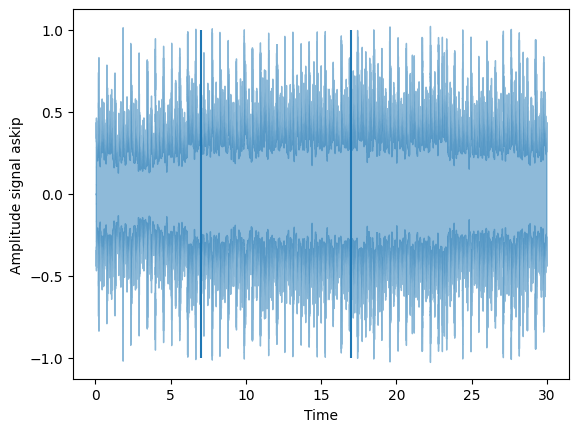

In [9]:
librosa.display.waveshow(y=x, sr=sr, alpha=0.5)
plt.vlines([start, end], -1, 1)
plt.ylabel('Amplitude signal askip')

(-1.0, 1.0)

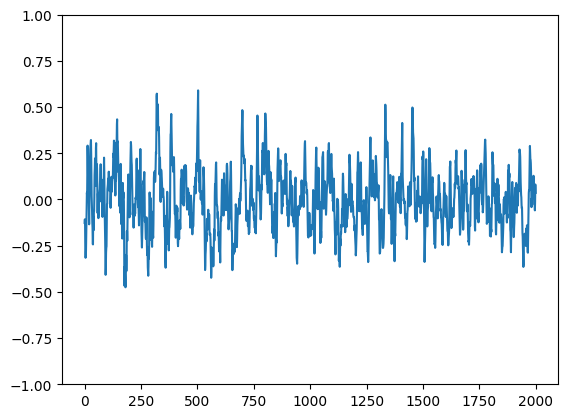

In [10]:
start = len(x) // 2
plt.figure()
plt.plot(x[start:start+2000])
plt.ylim((-1, 1))

### Log mel Spectogram

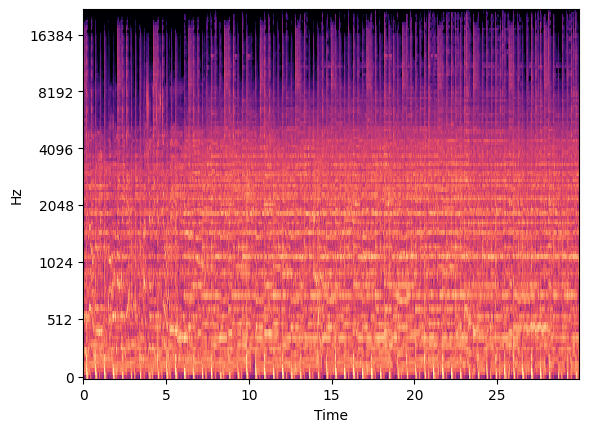

In [11]:
stft = np.abs(librosa.stft(x, n_fft=2048, hop_length=512))
mel = librosa.feature.melspectrogram(sr=sr, S=stft**2)
# log_mel = librosa.logamplitude(mel)
log_mel = librosa.power_to_db(mel, ref=np.max)


librosa.display.specshow(log_mel, sr=sr, hop_length=512, x_axis='time', y_axis='mel')

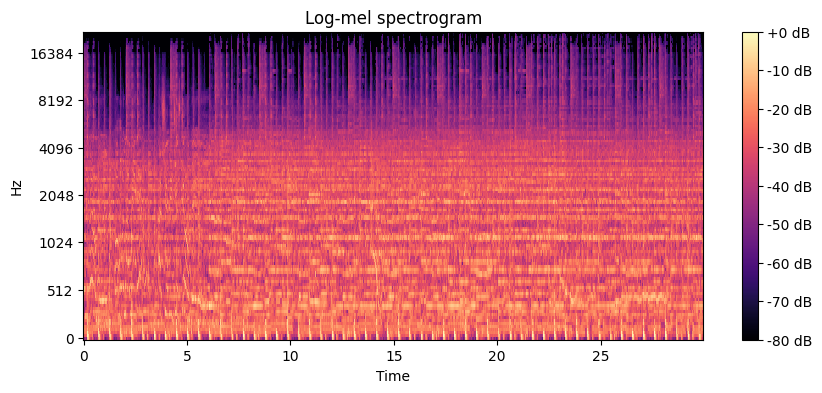

In [12]:
stft = np.abs(librosa.stft(x, n_fft=2048, hop_length=512)) # stft = Short-Time Fourier Transform

# Mel-spectrogramme (S doit être en puissance, pas en amplitude)
mel = librosa.feature.melspectrogram(sr=sr, S=stft**2)

# Conversion en dB (ancien logamplitude → remplacé)
log_mel = librosa.power_to_db(mel, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(log_mel, sr=sr, hop_length=512,
                         x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Log-mel spectrogram")
plt.show()


### Mel Spectogram

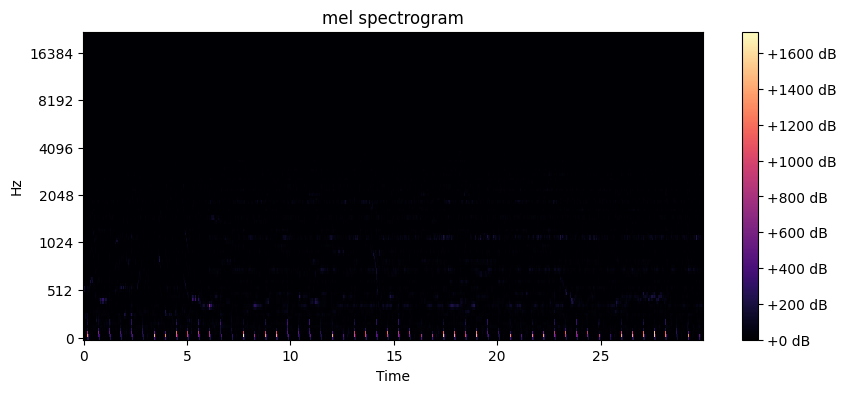

In [13]:
stft = np.abs(librosa.stft(x, n_fft=2048, hop_length=512)) # stft = Short-Time Fourier Transform

# Mel-spectrogramme (S doit être en puissance, pas en amplitude)
mel = librosa.feature.melspectrogram(sr=sr, S=stft**2)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mel, sr=sr, hop_length=512,
                         x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("mel spectrogram")
plt.show()


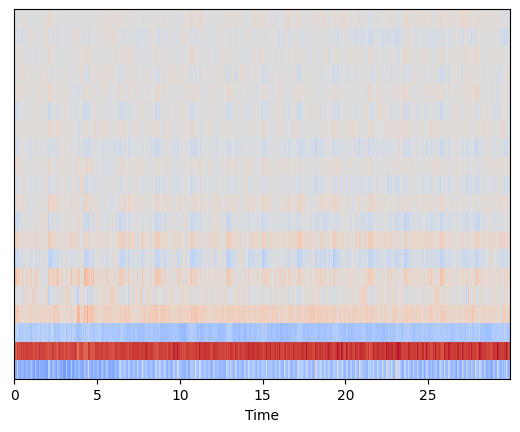

In [14]:
mfcc = librosa.feature.mfcc(S=librosa.power_to_db(mel), n_mfcc=20)
mfcc = skl.preprocessing.StandardScaler().fit_transform(mfcc)
librosa.display.specshow(mfcc, sr=sr, x_axis='time');

# Preprocessing fma_sall : get every mel_spectogram

## function : get_mel_spectrogram and others

In [15]:
def get_audio_path(track_id):
    track_number = '{:06d}'.format(track_id)
    file_name = track_number + '.mp3'
    AUDIO_DIR = '.././data/raw/fma_small'
    return os.path.join(AUDIO_DIR, track_number[:3], file_name)

print(get_audio_path(1039))

.././data/raw/fma_small\001\001039.mp3


### 

In [ ]:
def get_log_mel_spectrogram(filepath, display=False):

    x, sr = librosa.load(filepath, sr=None, mono=True)
    stft = np.abs(librosa.stft(x, n_fft=2048, hop_length=512)) # stft = Short-Time Fourier Transform

    # Mel-spectrogramme 
    mel = librosa.feature.melspectrogram(sr=sr, S=stft**2, n_mels=128) # sr = 

    # Conversion en dB (ancien logamplitude → remplacé)
    log_mel_spectrogram = librosa.power_to_db(mel, ref=np.max)

    if display:
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(log_mel_spectrogram, sr=sr, hop_length=512,
                                x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title("Log-mel spectrogram")
        plt.show()

    return log_mel_spectrogram

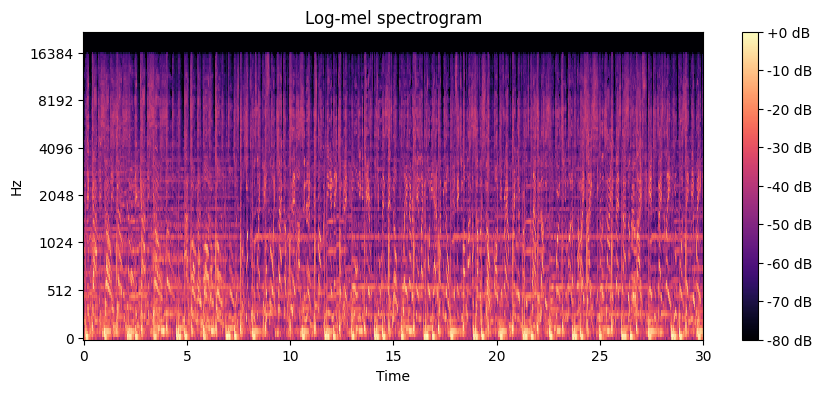

In [18]:
filepath = get_audio_path(5)

log_mel_spectrogram = get_log_mel_spectrogram(filepath)
plt.figure(figsize=(10, 4))
librosa.display.specshow(log_mel_spectrogram, sr=sr, hop_length=512,
                        x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Log-mel spectrogram")
plt.show()



In [19]:
log_mel_spectrogram

array([[-79.96324 , -45.171455, -31.47872 , ..., -23.292253, -29.970839,
        -30.02557 ],
       [-79.869644, -41.242   , -26.472303, ..., -19.233614, -17.55759 ,
        -21.066027],
       [-80.      , -41.61986 , -28.474632, ..., -13.4296  , -12.308689,
        -15.666765],
       ...,
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -74.05621 ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -74.10535 ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -74.13606 ]], dtype=float32)

In [ ]:
def get_music_label(track_id):


# Model - baseline

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms


print(torch.cuda.is_available())

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

transform = transforms.ToTensor()
batch_size = 8

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)


testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)

classes = ('T-shirt/top', 'Trouser/pants','Pullover shirt','Dress','Coat','Sandal',
           'Shirt','Sneaker','Bag','Ankle boot')


train_iter = iter(trainset)

image, label = next(train_iter)

image.shape, label


torch.min(image).item(), torch.max(image).item()


import matplotlib.pyplot as plt
import numpy as np

np_img = image.numpy()
print(classes[label])
plt.imshow(np_img.reshape((28, 28, 1)))


print(f'Number of batches in the training set: {int(50000 / batch_size)}')


trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size,
                                          shuffle=False, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)



import torch.nn as nn
import torch.nn.functional as F

class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=256, kernel_size=3)
        self.pool1 = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3)
        self.pool2 = nn.MaxPool2d(2, 2)

        self.conv3 = nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=2)
        self.pool3 = nn.MaxPool2d(2, 2)

        self.flatten = nn.Flatten()

        self.fc1 = nn.Linear(in_features=4096, out_features=1024)
        self.drop1 = nn.Dropout(p=0.3)

        self.fc2 = nn.Linear(in_features=1024, out_features=1024)
        self.drop2 = nn.Dropout(p=0.3)
        
        self.out = nn.Linear(in_features=1024, out_features=10)

    
    def forward(self, x):
      x = F.relu(self.conv1(x))
      x = self.pool1(x)

      x = F.relu(self.conv2(x))
      x = self.pool2(x)

      x = F.relu(self.conv3(x))
      x = self.pool3(x)

      x = self.flatten(x)

      x = F.relu(self.fc1(x))
      x = self.drop1(x)

      x = F.relu(self.fc2(x))
      x = self.drop2(x)

      x = self.out(x)

      return x
    

net = NeuralNet()
net.to(device)

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)


def train_one_epoch():
  net.train(True)

  running_loss = 0.0
  running_accuracy = 0.0

  for batch_index, data in enumerate(trainloader):
    inputs, labels = data[0].to(device), data[1].to(device)

    optimizer.zero_grad()

    outputs = net(inputs) # shape: [batch_size, 10]
    correct = torch.sum(labels == torch.argmax(outputs, dim=1)).item()
    running_accuracy += correct / batch_size

    loss = criterion(outputs, labels)
    running_loss += loss.item()
    loss.backward()
    optimizer.step()

    if batch_index % 500 == 499:  # print every 500 batches
      avg_loss_across_batches = running_loss / 500
      avg_acc_across_batches = (running_accuracy / 500) * 100
      print('Batch {0}, Loss: {1:.3f}, Accuracy: {2:.1f}%'.format(batch_index+1,
                                                          avg_loss_across_batches,
                                                          avg_acc_across_batches))
      running_loss = 0.0
      running_accuracy = 0.0

    
  print()

  def validate_one_epoch():
    net.train(False)
    running_loss = 0.0
    running_accuracy = 0.0
    
    for i, data in enumerate(valloader):
        inputs, labels = data[0].to(device), data[1].to(device)
        
        with torch.no_grad():
            outputs = net(inputs) # shape: [batch_size, 10]
            correct = torch.sum(labels == torch.argmax(outputs, dim=1)).item()
            running_accuracy += correct / batch_size
            loss = criterion(outputs, labels) # One number, the average batch loss
            running_loss += loss.item()
        
    avg_loss_across_batches = running_loss / len(valloader)
    avg_acc_across_batches = (running_accuracy / len(valloader)) * 100
    
    print('Val Loss: {0:.3f}, Val Accuracy: {1:.1f}%'.format(avg_loss_across_batches,
                                                            avg_acc_across_batches))
    print('***************************************************')





    print()


num_epochs = 10

for epoch_index in range(num_epochs):
    print(f'Epoch: {epoch_index + 1}\n')
    
    train_one_epoch()
    validate_one_epoch()
        

print('Finished Training')

True


# Testing baseline